<a href="https://colab.research.google.com/github/chad-fisher/CRWA-Regional-Tree-Planting-and-Protection-Plan/blob/main/CodeNotebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
#Import packages
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
# Soils Data
!wget https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/Soils_MassGIS_SHP.zip
!unzip "Soils_MassGIS_SHP.zip"

--2024-02-21 15:31:36--  https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/Soils_MassGIS_SHP.zip
Resolving s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)... 16.182.65.176, 52.217.130.24, 54.231.195.128, ...
Connecting to s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)|16.182.65.176|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 279371815 (266M) [application/octet-stream]
Saving to: ‘Soils_MassGIS_SHP.zip.3’

Soils_MassGIS_SHP.z 100%[===================>] 266.43M  28.8MB/s    in 8.7s    

2024-02-21 15:31:45 (30.6 MB/s) - ‘Soils_MassGIS_SHP.zip.3’ saved [279371815/279371815]

Archive:  Soils_MassGIS_SHP.zip
replace Soil Survey Areas.lyr? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [5]:
# Watershed boundaries
!wget https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/watshd.zip
!unzip "watshd.zip"

--2024-02-21 15:36:43--  https://s3.us-east-1.amazonaws.com/download.massgis.digital.mass.gov/shapefiles/state/watshd.zip
Resolving s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)... 52.216.62.64, 54.231.162.184, 52.217.168.16, ...
Connecting to s3.us-east-1.amazonaws.com (s3.us-east-1.amazonaws.com)|52.216.62.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1366527 (1.3M) [application/x-zip-compressed]
Saving to: ‘watshd.zip’

watshd.zip          100%[===================>]   1.30M  3.52MB/s    in 0.4s    

2024-02-21 15:36:44 (3.52 MB/s) - ‘watshd.zip’ saved [1366527/1366527]

Archive:  watshd.zip
 extracting: watshda1.cpg            
  inflating: watshda1.dbf            
  inflating: watshda1.prj            
  inflating: watshda1.sbn            
  inflating: watshda1.sbx            
  inflating: watshda1.shp            
  inflating: watshda1.shx            
 extracting: watshdp1.cpg            
  inflating: watshdp1.dbf            
  inflating: wat

In [16]:
Ag_soils = gpd.read_file("SOILS_POLY_PRIMEFARMLAND.shp")

<Axes: >

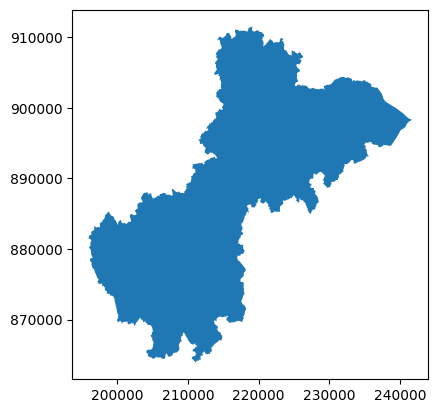

In [13]:
#Extracting Charles River Watershed Boundary
CRW_ = gpd.read_file("watshdp1.shp")
CRW = CRW_[CRW_.NAME=="CHARLES"]
CRW.plot()

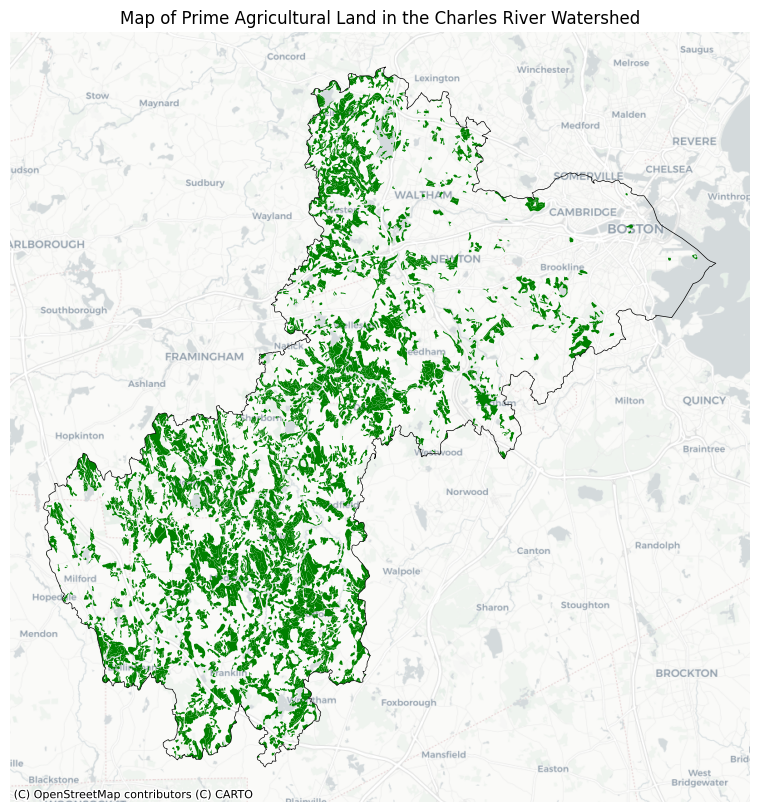

In [42]:
Ag_soils_clip = gpd.clip(Ag_soils,CRW)
ax = Ag_soils_clip.to_crs(epsg=3857).plot(figsize=(10,10),color='green')
CRW.to_crs(epsg=3857).boundary.plot(ax=ax, color='black',linewidth=0.5)
plt.title("Map of Prime Agricultural Land in the Charles River Watershed")
cx.add_basemap(ax,source=cx.providers.CartoDB.Positron)
ax.set_axis_off()